In [301]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [302]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### 5 Input 1 Output - 1

In [303]:
m = n_input = 5

In [304]:
np.random.seed(0)
x_min = np.random.uniform(1,10, m)
x_min

array([5.94, 7.44, 6.42, 5.9 , 4.81])

In [305]:
np.random.seed(4)
delta_x = np.random.uniform(1,1000, m)
delta_x

array([967.06, 547.69, 972.71, 715.1 , 698.03])

In [306]:
x_max = x_min + delta_x
x_max

array([973.  , 555.12, 979.14, 721.01, 702.84])

In [307]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([489.47, 281.28, 492.78, 363.45, 353.83])

In [308]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([161.18,  91.28, 162.12, 119.18, 116.34])

In [309]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [310]:
std_list

[88.45618813682478,
 65.28308337122745,
 97.71916225532115,
 64.94110097658067,
 49.28737063531463]

In [311]:
cov_matrix_int = []

for i in range(m):
    for j in range(m):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [312]:
cov_matrix_int

[(0, 1, -5774.692704837313, 5774.692704837313),
 (0, 2, -8643.864601029594, 8643.864601029594),
 (0, 3, -5744.442245796955, 5744.442245796955),
 (0, 4, -4359.772929686804, 4359.772929686804),
 (1, 2, -6379.408216480633, 6379.408216480633),
 (1, 3, -4239.555309273416, 4239.555309273416),
 (1, 4, -3217.6315263338324, 3217.6315263338324),
 (2, 3, -6345.989983369682, 6345.989983369682),
 (2, 4, -4816.320568250461, 4816.320568250461),
 (3, 4, -3200.7761132981245, 3200.7761132981245)]

In [313]:
len(cov_matrix_int)

10

In [314]:
cov_list = []
np.random.seed(2)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list

[-739.2195433459383,
 -8195.6589259592,
 570.5664719148272,
 -563.9593636394957,
 -1016.012595318969,
 -1438.6098208237,
 -1900.6637329311984,
 1513.7847155362688,
 -1929.8546318684898,
 -1492.6673762467587]

In [315]:
cov_matrix = np.zeros((m, m))
print(len(cov_matrix))
cov_matrix

5


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [316]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[ 7824.5   -739.22 -8195.66   570.57  -563.96]
 [ -739.22  4261.88 -1016.01 -1438.61 -1900.66]
 [-8195.66 -1016.01  9549.03  1513.78 -1929.85]
 [  570.57 -1438.61  1513.78  4217.35 -1492.67]
 [ -563.96 -1900.66 -1929.85 -1492.67  2429.24]]


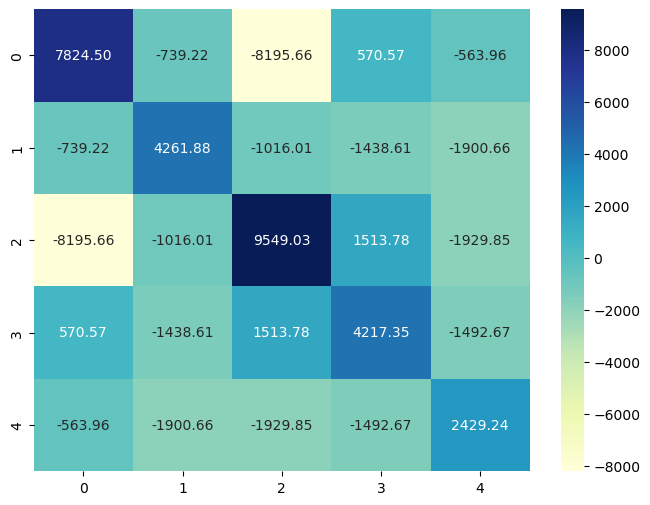

In [317]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [338]:
np.random.seed(1)
df51 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
df51.columns = ["Input " + str(i + 1) for i in range(m)]
df51.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(df51))]
df51 = df51.round(2)
df51

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_11436/3340323176.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5
DMU 0001,297.05,278.35,610.26,346.60,359.56
DMU 0002,726.55,170.31,295.74,417.47,403.38
DMU 0003,289.29,369.62,586.33,275.17,380.85
DMU 0004,560.78,259.74,372.31,334.00,419.41
DMU 0005,620.35,285.85,404.26,458.16,334.64
...,...,...,...,...,...
DMU 0996,360.84,159.65,684.56,410.24,375.58
DMU 0997,627.54,303.87,326.63,440.97,333.79
DMU 0998,372.33,297.94,620.79,374.65,397.02
DMU 0999,574.33,356.52,471.89,391.15,361.48


In [339]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,493.069940,281.187200,493.89575,366.340230,353.777480
std,91.920458,66.829564,97.11625,66.142017,56.113152
min,139.920000,88.390000,223.58000,150.280000,156.120000
25%,430.272500,237.772500,424.82250,322.237500,316.220000
50%,491.065000,284.050000,492.89000,366.455000,355.295000
75%,556.462500,327.697500,555.78250,409.147500,389.082500
max,726.550000,479.440000,861.62000,575.590000,562.150000


In [340]:
random.seed(1)  # Set the random seed for reproducibility

numbers = sorted([random.uniform(1, 3) for _ in range(2)])
print(numbers)

[1.2687284882248024, 2.6948674738744653]


In [341]:
df511 = df51.iloc[:,:2] * np.array(numbers)

In [342]:
# Add noise to each column
noise_std = df51.std().mean()
df512 = df511 + np.random.normal(0, noise_std, size=df51.iloc[:,:2].shape)

In [343]:
df51["Output"] = df512.sum(axis=1)

In [344]:
df51

,Input 1,Input 2,Input 3,Input 4,Input 5,Output
DMU 0001,297.05,278.35,610.26,346.60,359.56,1142.429694
DMU 0002,726.55,170.31,295.74,417.47,403.38,1240.585759
DMU 0003,289.29,369.62,586.33,275.17,380.85,1519.009699
DMU 0004,560.78,259.74,372.31,334.00,419.41,1394.024111
DMU 0005,620.35,285.85,404.26,458.16,334.64,1693.505421
...,...,...,...,...,...,...
DMU 0996,360.84,159.65,684.56,410.24,375.58,744.446355
DMU 0997,627.54,303.87,326.63,440.97,333.79,1720.904676
DMU 0998,372.33,297.94,620.79,374.65,397.02,1261.041060
DMU 0999,574.33,356.52,471.89,391.15,361.48,1500.422656


In [345]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,493.069940,281.187200,493.89575,366.340230,353.777480,1378.296371
std,91.920458,66.829564,97.11625,66.142017,56.113152,233.182698
min,139.920000,88.390000,223.58000,150.280000,156.120000,535.665810
25%,430.272500,237.772500,424.82250,322.237500,316.220000,1229.499785
50%,491.065000,284.050000,492.89000,366.455000,355.295000,1387.781109
75%,556.462500,327.697500,555.78250,409.147500,389.082500,1532.594010
max,726.550000,479.440000,861.62000,575.590000,562.150000,2131.354184


In [346]:
df51.to_excel("Data/RealData/Simulation/df51.xlsx")

In [347]:
(df51<=0).sum()

Input 1    0
Input 2    0
Input 3    0
Input 4    0
Input 5    0
Output     0
dtype: int64

### 5 Input 1 Output - 2

In [91]:
m = n_input = 5

In [92]:
np.random.seed(1)
x_min = np.random.uniform(1,10, m)
x_min

array([4.75, 7.48, 1.  , 3.72, 2.32])

In [93]:
np.random.seed(2)
delta_x = np.random.uniform(1,1000, m)
delta_x

array([436.56,  26.9 , 550.11, 435.89, 420.95])

In [94]:
x_max = x_min + delta_x
x_max

array([441.31,  34.38, 551.11, 439.61, 423.27])

In [95]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([223.03,  20.93, 276.06, 221.66, 212.79])

In [96]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([72.76,  4.48, 91.69, 72.65, 70.16])

In [99]:
np.random.seed(21)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [100]:
std_list

[3.5452134535708533,
 1.2961896998533344,
 66.10213781076324,
 1.5703739741881655,
 14.44710995004724]

In [101]:
cov_matrix_int = []

for i in range(m):
    for j in range(m):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [102]:
cov_matrix_int

[(0, 1, -4.595269162300007, 4.595269162300007),
 (0, 2, -234.34618827651244, 234.34618827651244),
 (0, 3, -5.5673109404294125, 5.5673109404294125),
 (0, 4, -51.21808856012481, 51.21808856012481),
 (1, 2, -85.68091016859695, 85.68091016859695),
 (1, 3, -2.035502570260446, 2.035502570260446),
 (1, 4, -18.726195109899855, 18.726195109899855),
 (2, 3, -103.80507685622207, 103.80507685622207),
 (2, 4, -954.9848528852715, 954.9848528852715),
 (3, 4, -22.687365467789075, 22.687365467789075)]

In [103]:
len(cov_matrix_int)

10

In [104]:
cov_list = []
np.random.seed(5)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list

[-2.5550324156002686,
 173.7594056472582,
 -3.265571310194381,
 42.88090110999744,
 -1.985879783662142,
 0.4549098402983325,
 9.958884803411276,
 3.823761293375682,
 -388.10488621718525,
 -14.169565226388642]

In [105]:
cov_matrix = np.zeros((m, m))
print(len(cov_matrix))
cov_matrix

5


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [106]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[  12.57   -2.56  173.76   -3.27   42.88]
 [  -2.56    1.68   -1.99    0.45    9.96]
 [ 173.76   -1.99 4369.49    3.82 -388.1 ]
 [  -3.27    0.45    3.82    2.47  -14.17]
 [  42.88    9.96 -388.1   -14.17  208.72]]


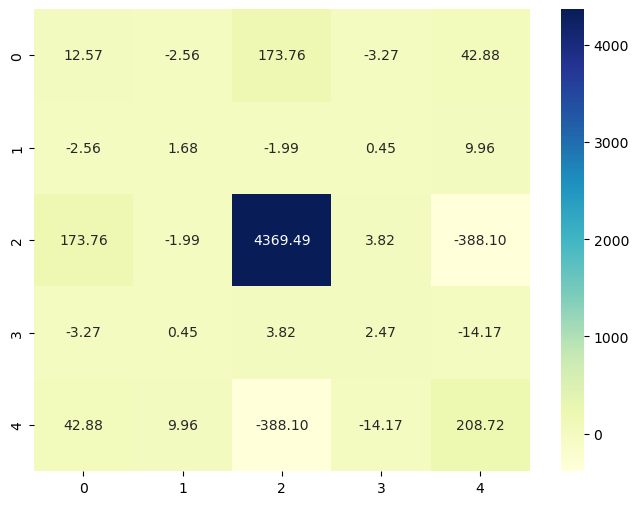

In [108]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [109]:
np.random.seed(0)
df51 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
df51.columns = ["Input " + str(i + 1) for i in range(m)]
df51.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(df51))]
df51 = df51.round(2)
df51

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_11436/1252492691.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5
DMU 0001,217.56,17.09,160.06,217.98,229.55
DMU 0002,229.84,21.98,341.62,220.38,219.18
DMU 0003,226.09,20.87,268.24,219.84,233.63
DMU 0004,229.42,21.30,255.51,220.69,234.23
DMU 0005,228.47,22.19,445.72,219.65,206.89
...,...,...,...,...,...
DMU 0996,210.29,20.80,161.08,224.62,199.55
DMU 0997,216.77,19.46,363.59,222.25,198.45
DMU 0998,238.38,21.33,407.61,217.43,232.88
DMU 0999,227.18,22.06,314.35,223.21,214.72


In [110]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,223.387690,21.00710,280.170070,221.647800,212.833470
std,5.834212,2.16012,65.375153,1.604246,13.882685
min,204.210000,15.04000,82.960000,215.990000,169.300000
25%,219.435000,19.50500,234.965000,220.617500,203.587500
50%,223.250000,20.98500,280.640000,221.740000,212.855000
75%,227.450000,22.56000,327.200000,222.720000,222.497500
max,243.970000,28.25000,465.270000,226.790000,251.480000


In [112]:
random.seed(10)  # Set the random seed for reproducibility

numbers = sorted([random.uniform(0, 3) for _ in range(5)])
print(numbers)

[0.6182946964185052, 1.286667164025344, 1.7142077840697405, 1.7342739034034111, 2.43996375407196]


In [113]:

noise_std

75.62428825178479

In [114]:
df511 = df51 * np.array(numbers)

In [115]:
# Add noise to each column
noise_std = df51.std().mean()
df512 = df511 + np.random.normal(0, noise_std, size=df51.shape)

In [116]:
df51["Output"] = df512.sum(axis=1)

In [117]:
df51

,Input 1,Input 2,Input 3,Input 4,Input 5,Output
DMU 0001,217.56,17.09,160.06,217.98,229.55,1295.680392
DMU 0002,229.84,21.98,341.62,220.38,219.18,1745.196275
DMU 0003,226.09,20.87,268.24,219.84,233.63,1531.557748
DMU 0004,229.42,21.30,255.51,220.69,234.23,1563.294976
DMU 0005,228.47,22.19,445.72,219.65,206.89,1751.695613
...,...,...,...,...,...,...
DMU 0996,210.29,20.80,161.08,224.62,199.55,1332.687803
DMU 0997,216.77,19.46,363.59,222.25,198.45,1636.510721
DMU 0998,238.38,21.33,407.61,217.43,232.88,1812.002726
DMU 0999,227.18,22.06,314.35,223.21,214.72,1661.317781


In [118]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,223.387690,21.00710,280.170070,221.647800,212.833470,1547.154827
std,5.834212,2.16012,65.375153,1.604246,13.882685,109.789565
min,204.210000,15.04000,82.960000,215.990000,169.300000,1207.382179
25%,219.435000,19.50500,234.965000,220.617500,203.587500,1470.006500
50%,223.250000,20.98500,280.640000,221.740000,212.855000,1547.706355
75%,227.450000,22.56000,327.200000,222.720000,222.497500,1622.732352
max,243.970000,28.25000,465.270000,226.790000,251.480000,1892.593325


In [119]:
df51.to_excel("Data/RealData/Simulation/df52.xlsx")

In [120]:
(df51<=0).sum()

Input 1    0
Input 2    0
Input 3    0
Input 4    0
Input 5    0
Output     0
dtype: int64

### 10 Input 1 Output - 1

In [146]:
m = n_input = 10

In [243]:
np.random.seed(24)
x_min = np.random.uniform(1,10, m)
x_min

array([ 9.64,  7.3 , 10.  ,  2.98,  4.25,  7.66,  9.97,  3.85,  2.23,  4.46])

In [244]:
np.random.seed(33)
delta_x = np.random.uniform(1,1000, m)
delta_x

array([249.26, 450.53, 411.53, 261.04, 870.53, 185.85,  20.64, 953.3 , 680.77, 487.1 ])

In [245]:
x_max = x_min + delta_x
x_max

array([258.9 , 457.82, 421.53, 264.02, 874.77, 193.51,  30.61, 957.15, 683.  , 491.56])

In [246]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([134.27, 232.56, 215.76, 133.5 , 439.51, 100.59,  20.29, 480.5 , 342.61, 248.01])

In [247]:
std_max = (x_max - x_min) * 0.5 * (1/3.33)
std_max

array([ 37.43,  67.65,  61.79,  39.2 , 130.71,  27.91,   3.1 , 143.14, 102.22,  73.14])

In [248]:
np.random.seed(7)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [249]:
std_list

[2.8559651086387907,
 52.7587479623108,
 27.089863453340623,
 28.356292728604227,
 127.8325234456286,
 15.027340731457352,
 1.553154707019695,
 10.313251875593092,
 27.4392341578931,
 36.560590868371676]

In [250]:
cov_matrix_int = []

for i in range(m):
    for j in range(m):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [251]:
cov_matrix_int

[(0, 1, -150.67714335582755, 150.67714335582755),
 (0, 2, -77.36770482052997, 77.36770482052997),
 (0, 3, -80.98458264324152, 80.98458264324152),
 (0, 4, -365.0852267099654, 365.0852267099654),
 (0, 5, -42.917560804668724, 42.917560804668724),
 (0, 6, -4.435755651566352, 4.435755651566352),
 (0, 7, -29.454287513297437, 29.454287513297437),
 (0, 8, -78.36549536271238, 78.36549536271238),
 (0, 9, -104.41577187128749, 104.41577187128749),
 (1, 2, -1429.2272782682123, 1429.2272782682123),
 (1, 3, -1496.042501213937, 1496.042501213937),
 (1, 4, -6744.283885854105, 6744.283885854105),
 (1, 5, -792.8236821947256, 792.8236821947256),
 (1, 6, -81.94249773412875, 81.94249773412875),
 (1, 7, -544.1142563762451, 544.1142563762451),
 (1, 8, -1447.6596392151114, 1447.6596392151114),
 (1, 9, -1928.890998977583, 1928.890998977583),
 (2, 3, -768.1680980608442, 768.1680980608442),
 (2, 4, -3462.965605038042, 3462.965605038042),
 (2, 5, -407.08860848200345, 407.08860848200345),
 (2, 6, -42.0747489350768,

In [252]:
len(cov_matrix_int)

45

In [253]:
cov_list = []
np.random.seed(5)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list

[-83.7785496272207,
 57.365415263531204,
 -47.5024536041878,
 305.6573164555611,
 -0.9947270191034931,
 0.9913369427965328,
 15.664252913631692,
 2.8866694864952507,
 -42.4344649435545,
 -892.6346768428415,
 -1254.4577618655567,
 3216.218094785987,
 -93.06287602900068,
 -55.99788578146046,
 413.45831040376413,
 -654.0918218522909,
 -330.8625994440886,
 -313.2897804568661,
 891.9761975888482,
 65.00212610862445,
 8.40899171856055,
 -130.85305735720914,
 -320.0967814501603,
 -488.10303552357163,
 -1250.1118746112525,
 -303.2571834908174,
 -29.45396247177939,
 271.34887381272625,
 716.1817625194334,
 -646.0552719694311,
 -1827.5979085455267,
 -117.31726136438894,
 526.9352562959898,
 1960.8655593582648,
 -4459.270892970636,
 3.6252688210781265,
 -154.4717396656075,
 12.759914010321154,
 153.60930383875268,
 15.557536887163053,
 -20.53325647642933,
 34.35411981212542,
 209.68433791728137,
 318.802740243368,
 -998.7520416155193]

In [254]:
cov_matrix = np.zeros((m, m))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [255]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[    8.16   -83.78    57.37   -47.5    305.66    -0.99     0.99    15.66     2.89   -42.43]
 [  -83.78  2783.49  -892.63 -1254.46  3216.22   -93.06   -56.     413.46  -654.09  -330.86]
 [   57.37  -892.63   733.86  -313.29   891.98    65.       8.41  -130.85  -320.1   -488.1 ]
 [  -47.5  -1254.46  -313.29   804.08 -1250.11  -303.26   -29.45   271.35   716.18  -646.06]
 [  305.66  3216.22   891.98 -1250.11 16341.15 -1827.6   -117.32   526.94  1960.87 -4459.27]
 [   -0.99   -93.06    65.    -303.26 -1827.6    225.82     3.63  -154.47    12.76   153.61]
 [    0.99   -56.       8.41   -29.45  -117.32     3.63     2.41    15.56   -20.53    34.35]
 [   15.66   413.46  -130.85   271.35   526.94  -154.47    15.56   106.36   209.68   318.8 ]
 [    2.89  -654.09  -320.1    716.18  1960.87    12.76   -20.53   209.68   752.91  -998.75]
 [  -42.43  -330.86  -488.1   -646.06 -4459.27   153.61    34.35   318.8   -998.75  1336.68]]


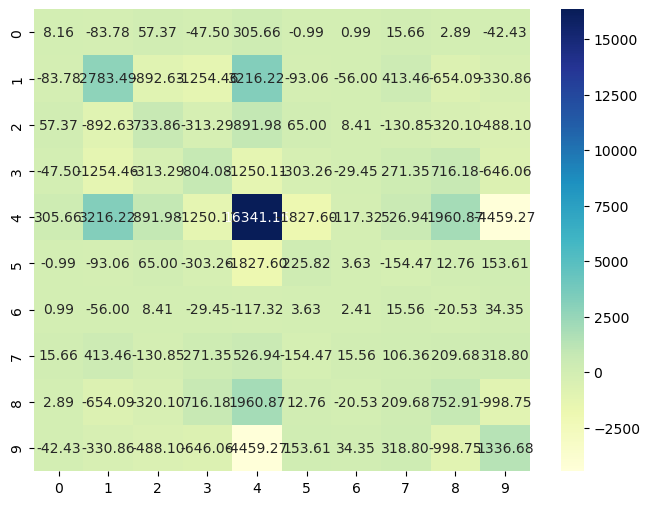

In [256]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [262]:
np.random.seed(1)
df51 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
df51.columns = ["Input " + str(i + 1) for i in range(m)]
df51.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(df51))]
df51 = df51.round(2)
df51

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_11436/3340323176.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10
DMU 0001,138.34,201.53,176.01,155.67,250.67,117.58,26.72,498.92,309.58,377.51
DMU 0002,127.61,274.75,160.44,112.76,258.94,122.94,21.59,492.00,257.03,358.92
DMU 0003,138.95,181.35,243.06,132.79,592.47,80.72,19.07,484.57,350.32,193.69
DMU 0004,137.64,294.26,214.60,151.06,522.92,80.91,19.89,476.19,357.85,237.64
DMU 0005,131.51,272.78,176.59,94.47,451.56,81.66,19.04,530.57,330.32,229.65
...,...,...,...,...,...,...,...,...,...,...
DMU 0996,143.34,208.77,235.56,133.78,385.87,78.69,23.73,487.25,374.76,255.10
DMU 0997,131.75,253.49,199.08,66.98,366.79,152.38,20.42,483.19,301.28,275.55
DMU 0998,136.53,145.29,248.34,174.66,293.38,114.44,22.78,454.27,319.74,279.53
DMU 0999,134.21,329.98,221.42,74.81,650.98,98.17,19.95,498.20,313.00,238.53


In [263]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,134.574300,231.429910,215.474490,132.348550,438.791620,99.934510,20.385390,481.636250,342.952200,247.13678
std,6.616084,53.371601,35.378927,38.552123,127.084543,27.704327,2.621528,21.307112,36.524995,46.06161
min,112.260000,77.200000,91.790000,11.150000,78.820000,7.710000,13.440000,404.500000,201.010000,76.15000
25%,130.277500,194.550000,192.522500,105.265000,347.497500,81.550000,18.475000,468.450000,317.960000,217.32500
50%,134.805000,232.100000,217.555000,131.820000,436.110000,100.505000,20.290000,482.645000,344.030000,246.84000
75%,138.832500,267.837500,237.232500,158.892500,529.755000,118.530000,22.220000,495.325000,367.685000,278.23750
max,153.510000,418.620000,354.860000,266.440000,898.170000,183.410000,28.450000,555.760000,450.620000,381.70000


In [264]:
random.seed(1)  # Set the random seed for reproducibility

numbers = sorted([random.uniform(0, 3) for _ in range(m)])
print(numbers)

[0.08504242956601893, 0.2815787603227047, 0.40309273233720366, 0.7652070772182651, 1.3484731943662145, 1.486305261275823, 1.9547789181682889, 2.291323856929842, 2.3661700534065395, 2.542301210811698]


In [265]:
df511 = df51 * np.array(numbers)

In [266]:
# Add noise to each column
noise_std = df51.std().mean()
df512 = df511 + np.random.normal(0, noise_std, size=df51.shape)

In [267]:
df51["Output"] = df512.sum(axis=1)

In [268]:
df51

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Output
DMU 0001,138.34,201.53,176.01,155.67,250.67,117.58,26.72,498.92,309.58,377.51,3635.214666
DMU 0002,127.61,274.75,160.44,112.76,258.94,122.94,21.59,492.00,257.03,358.92,3396.975933
DMU 0003,138.95,181.35,243.06,132.79,592.47,80.72,19.07,484.57,350.32,193.69,3894.242341
DMU 0004,137.64,294.26,214.60,151.06,522.92,80.91,19.89,476.19,357.85,237.64,3560.494311
DMU 0005,131.51,272.78,176.59,94.47,451.56,81.66,19.04,530.57,330.32,229.65,3414.093999
...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,143.34,208.77,235.56,133.78,385.87,78.69,23.73,487.25,374.76,255.10,3370.013005
DMU 0997,131.75,253.49,199.08,66.98,366.79,152.38,20.42,483.19,301.28,275.55,3357.103834
DMU 0998,136.53,145.29,248.34,174.66,293.38,114.44,22.78,454.27,319.74,279.53,3393.153973
DMU 0999,134.21,329.98,221.42,74.81,650.98,98.17,19.95,498.20,313.00,238.53,3917.810692


In [269]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Output
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,134.574300,231.429910,215.474490,132.348550,438.791620,99.934510,20.385390,481.636250,342.952200,247.13678,3591.914458
std,6.616084,53.371601,35.378927,38.552123,127.084543,27.704327,2.621528,21.307112,36.524995,46.06161,192.467708
min,112.260000,77.200000,91.790000,11.150000,78.820000,7.710000,13.440000,404.500000,201.010000,76.15000,2798.152759
25%,130.277500,194.550000,192.522500,105.265000,347.497500,81.550000,18.475000,468.450000,317.960000,217.32500,3456.742585
50%,134.805000,232.100000,217.555000,131.820000,436.110000,100.505000,20.290000,482.645000,344.030000,246.84000,3591.767398
75%,138.832500,267.837500,237.232500,158.892500,529.755000,118.530000,22.220000,495.325000,367.685000,278.23750,3728.206841
max,153.510000,418.620000,354.860000,266.440000,898.170000,183.410000,28.450000,555.760000,450.620000,381.70000,4308.692469


In [270]:
df51.to_excel("Data/RealData/Simulation/df101.xlsx")

In [271]:
(df51<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Input 6     0
Input 7     0
Input 8     0
Input 9     0
Input 10    0
Output      0
dtype: int64

### 10 Input 1 Output - 2

In [272]:
m = n_input = 10

In [273]:
np.random.seed(34)
x_min = np.random.uniform(1,10, m)
x_min

array([1.35, 8.02, 1.83, 6.7 , 1.13, 9.43, 4.84, 3.28, 2.71, 4.73])

In [274]:
np.random.seed(42)
delta_x = np.random.uniform(1,1000, m)
delta_x

array([375.17, 950.76, 732.26, 599.06, 156.86, 156.84,  59.03, 866.31, 601.51, 708.36])

In [275]:
x_max = x_min + delta_x
x_max

array([376.51, 958.78, 734.1 , 605.76, 157.99, 166.26,  63.86, 869.59, 604.22, 713.1 ])

In [276]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([188.93, 483.4 , 367.97, 306.23,  79.56,  87.84,  34.35, 436.43, 303.47, 358.92])

In [277]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 62.53, 158.46, 122.04,  99.84,  26.14,  26.14,   9.84, 144.38, 100.25, 118.06])

In [278]:
np.random.seed(41)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [279]:
std_list

[15.689651086487775,
 7.304371340608568,
 82.60112984423233,
 4.340137082361992,
 3.0437545530998698,
 15.784900740919065,
 1.878297214687911,
 96.52363845273773,
 91.97627177037229,
 49.4414915145164]

In [280]:
cov_matrix_int = []

for i in range(m):
    for j in range(m):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [281]:
cov_matrix_int

[(0, 1, -114.60303774028938, 114.60303774028938),
 (0, 2, -1295.9829066056775, 1295.9829066056775),
 (0, 3, -68.09523648978671, 68.09523648978671),
 (0, 4, -47.75544693104548, 47.75544693104548),
 (0, 5, -247.65958505986248, 247.65958505986248),
 (0, 6, -29.469827935175147, 29.469827935175147),
 (0, 7, -1514.4222089217496, 1514.4222089217496),
 (0, 8, -1443.0756123131164, 1443.0756123131164),
 (0, 9, -775.7197510583084, 775.7197510583084),
 (1, 2, -603.3493255360977, 603.3493255360977),
 (1, 3, -31.701972918717424, 31.701972918717424),
 (1, 4, -22.232713525509528, 22.232713525509528),
 (1, 5, -115.29877658632017, 115.29877658632017),
 (1, 6, -13.719780344111276, 13.719780344111276),
 (1, 7, -705.0444984054405, 705.0444984054405),
 (1, 8, -671.8288435355322, 671.8288435355322),
 (1, 9, -361.1390136555753, 361.1390136555753),
 (2, 3, -358.5002266819506, 358.5002266819506),
 (2, 4, -251.4175650545757, 251.4175650545757),
 (2, 5, -1303.8506356789749, 1303.8506356789749),
 (2, 6, -155.14947

In [282]:
len(cov_matrix_int)

45

In [284]:
cov_list = []
np.random.seed(25)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list

[84.83470079696076,
 213.25898633530392,
 -30.120029270584887,
 -29.998898975109814,
 -44.033810859882635,
 -22.551753579460932,
 560.2415488731199,
 -180.0639165664329,
 87.23639624915484,
 -160.3939966029119,
 -6.190398042141709,
 -17.20631049498677,
 -12.214557244342387,
 2.344576460016812,
 -476.6310858264252,
 27.83895883378443,
 -125.63944946616758,
 142.81662291001413,
 -67.18151437897237,
 877.1642328577973,
 -5.789265012790366,
 263.1443761664841,
 -1777.0471957853379,
 4063.8374762167105,
 0.3763482683298385,
 8.091318202393865,
 -7.590393730564337,
 184.26873440897515,
 -63.06912885763421,
 -27.0652811913682,
 -20.97653327214432,
 4.576797382299749,
 99.66222883129745,
 -24.59738740811008,
 -63.263748697768364,
 1.5309992164270163,
 180.5243117299649,
 712.2239515790061,
 512.5019003268766,
 117.3716608731103,
 -146.10544073988547,
 26.90546868556774,
 -3386.7782107809016,
 231.49068994872778,
 4166.2985587512385]

In [285]:
cov_matrix = np.zeros((m, m))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [286]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[  246.17    84.83   213.26   -30.12   -30.     -44.03   -22.55   560.24  -180.06    87.24]
 [   84.83    53.35  -160.39    -6.19   -17.21   -12.21     2.34  -476.63    27.84  -125.64]
 [  213.26  -160.39  6822.95   142.82   -67.18   877.16    -5.79   263.14 -1777.05  4063.84]
 [  -30.12    -6.19   142.82    18.84     0.38     8.09    -7.59   184.27   -63.07   -27.07]
 [  -30.     -17.21   -67.18     0.38     9.26   -20.98     4.58    99.66   -24.6    -63.26]
 [  -44.03   -12.21   877.16     8.09   -20.98   249.16     1.53   180.52   712.22   512.5 ]
 [  -22.55     2.34    -5.79    -7.59     4.58     1.53     3.53   117.37  -146.11    26.91]
 [  560.24  -476.63   263.14   184.27    99.66   180.52   117.37  9316.81 -3386.78   231.49]
 [ -180.06    27.84 -1777.05   -63.07   -24.6    712.22  -146.11 -3386.78  8459.63  4166.3 ]
 [   87.24  -125.64  4063.84   -27.07   -63.26   512.5     26.91   231.49  4166.3   2444.46]]


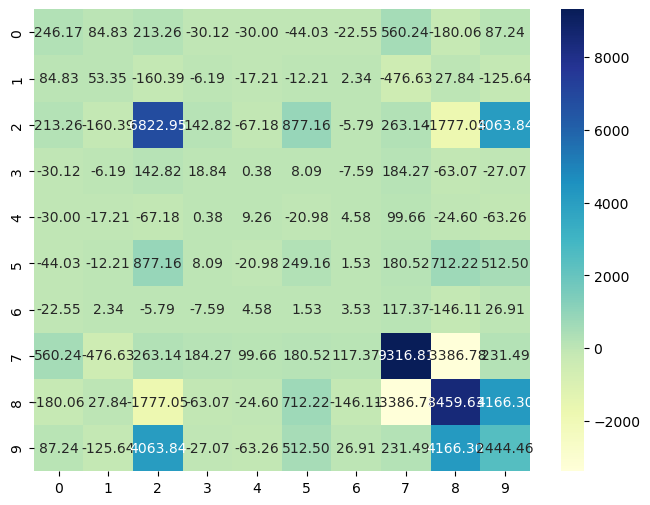

In [287]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [288]:
np.random.seed(10)
df51 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
df51.columns = ["Input " + str(i + 1) for i in range(m)]
df51.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(df51))]
df51 = df51.round(2)
df51

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_11436/3338156928.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10
DMU 0001,169.60,492.50,352.52,305.09,77.81,91.39,32.77,231.94,338.23,332.79
DMU 0002,172.26,496.10,281.77,305.23,81.63,73.50,31.20,315.55,264.37,331.67
DMU 0003,186.21,455.96,462.86,323.79,85.23,104.32,32.89,621.81,121.90,485.79
DMU 0004,173.44,471.56,418.37,310.61,83.49,96.41,41.67,479.39,301.93,364.33
DMU 0005,195.20,495.97,431.04,303.77,75.72,85.24,32.11,343.47,329.76,364.38
...,...,...,...,...,...,...,...,...,...,...
DMU 0996,172.49,489.03,340.92,307.38,79.45,80.75,30.37,345.27,382.56,301.37
DMU 0997,184.94,474.55,373.24,302.08,80.16,85.76,34.21,422.80,363.30,354.95
DMU 0998,176.65,479.97,355.14,309.04,82.61,90.41,29.81,408.28,342.84,428.24
DMU 0999,184.19,473.24,368.16,309.93,85.10,63.12,40.97,641.36,85.58,241.68


In [289]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,188.304340,483.744350,368.238880,306.221910,79.519320,87.978500,34.430610,430.841340,302.910420,358.565130
std,15.967485,10.712813,85.745906,5.965851,3.211277,17.799558,5.013746,96.122814,97.186221,69.438651
min,143.380000,447.530000,103.780000,285.660000,70.040000,30.170000,15.070000,130.060000,29.240000,117.050000
25%,177.217500,476.237500,309.850000,302.180000,77.280000,76.075000,31.097500,359.480000,237.662500,309.717500
50%,188.425000,483.550000,367.875000,306.225000,79.360000,87.605000,34.580000,431.960000,307.530000,358.435000
75%,198.872500,490.795000,425.865000,310.012500,81.790000,100.727500,37.697500,495.205000,367.452500,405.082500
max,233.270000,517.030000,644.810000,325.040000,90.650000,139.250000,49.930000,700.410000,626.470000,588.740000


In [293]:
random.seed(30)  # Set the random seed for reproducibility

numbers = sorted([random.uniform(0, 3) for _ in range(m)])
print(numbers)

[0.09011072565338119, 0.6300260866491934, 0.7718309249388277, 0.8675893309191616, 1.1915947878996822, 1.384599030187875, 1.6172446938174319, 1.9247344613240183, 1.9609072616782854, 2.9664336312111645]


In [294]:
df511 = df51 * np.array(numbers)

In [295]:
# Add noise to each column
noise_std = df51.std().mean()
df512 = df511 + np.random.normal(0, noise_std, size=df51.shape)

In [296]:
df51["Output"] = df512.sum(axis=1)

In [297]:
df51

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Output
DMU 0001,169.60,492.50,352.52,305.09,77.81,91.39,32.77,231.94,338.23,332.79,3177.431552
DMU 0002,172.26,496.10,281.77,305.23,81.63,73.50,31.20,315.55,264.37,331.67,3393.323380
DMU 0003,186.21,455.96,462.86,323.79,85.23,104.32,32.89,621.81,121.90,485.79,3939.339460
DMU 0004,173.44,471.56,418.37,310.61,83.49,96.41,41.67,479.39,301.93,364.33,3760.153721
DMU 0005,195.20,495.97,431.04,303.77,75.72,85.24,32.11,343.47,329.76,364.38,3712.694196
...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,172.49,489.03,340.92,307.38,79.45,80.75,30.37,345.27,382.56,301.37,3159.503640
DMU 0997,184.94,474.55,373.24,302.08,80.16,85.76,34.21,422.80,363.30,354.95,3784.893512
DMU 0998,176.65,479.97,355.14,309.04,82.61,90.41,29.81,408.28,342.84,428.24,3834.117488
DMU 0999,184.19,473.24,368.16,309.93,85.10,63.12,40.97,641.36,85.58,241.68,3272.959890


In [298]:
df51.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Output
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,188.304340,483.744350,368.238880,306.221910,79.519320,87.978500,34.430610,430.841340,302.910420,358.565130,3629.857527
std,15.967485,10.712813,85.745906,5.965851,3.211277,17.799558,5.013746,96.122814,97.186221,69.438651,393.690460
min,143.380000,447.530000,103.780000,285.660000,70.040000,30.170000,15.070000,130.060000,29.240000,117.050000,2280.913676
25%,177.217500,476.237500,309.850000,302.180000,77.280000,76.075000,31.097500,359.480000,237.662500,309.717500,3352.302998
50%,188.425000,483.550000,367.875000,306.225000,79.360000,87.605000,34.580000,431.960000,307.530000,358.435000,3644.106885
75%,198.872500,490.795000,425.865000,310.012500,81.790000,100.727500,37.697500,495.205000,367.452500,405.082500,3900.942397
max,233.270000,517.030000,644.810000,325.040000,90.650000,139.250000,49.930000,700.410000,626.470000,588.740000,4901.006726


In [299]:
df51.to_excel("Data/RealData/Simulation/df102.xlsx")

In [300]:
(df51<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Input 6     0
Input 7     0
Input 8     0
Input 9     0
Input 10    0
Output      0
dtype: int64